In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [0]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
daisy_dir='/content/drive/My Drive/flowers/daisy'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'

In [0]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            imagedetails.append(np.array(image))
            imagelabels.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandelion_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [03:59<00:00,  3.27it/s]


In [0]:
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 5 categories
y = to_categorical(y,5)
print(y)
#np.delete(X,1)
#np.delete(X,2)
print(X.shape)
print(y.shape)

[[[[ 17  40  12]
   [ 18  41  13]
   [ 19  41  14]
   ...
   [ 27  32  50]
   [ 27  32  50]
   [ 28  30  49]]

  [[ 19  42  14]
   [ 20  43  15]
   [ 21  43  17]
   ...
   [ 29  33  51]
   [ 27  32  51]
   [ 27  31  50]]

  [[ 20  47  16]
   [ 22  48  17]
   [ 24  48  19]
   ...
   [ 27  33  50]
   [ 27  32  50]
   [ 26  31  49]]

  ...

  [[  2  10   1]
   [  2   9   2]
   [  1   7   1]
   ...
   [ 50  68  26]
   [ 52  69  27]
   [ 52  72  29]]

  [[  3  10   1]
   [  1   8   1]
   [  1   5   1]
   ...
   [ 46  64  24]
   [ 47  65  24]
   [ 48  67  28]]

  [[  1   8   2]
   [  1   6   1]
   [  0   3   1]
   ...
   [ 41  58  24]
   [ 39  58  25]
   [ 39  60  26]]]


 [[[ 48   1  25]
   [ 49   4  30]
   [ 43   1  25]
   ...
   [ 89 145 124]
   [126 162 153]
   [140 164 167]]

  [[ 57   9  32]
   [ 56  19  42]
   [ 54  24  47]
   ...
   [ 84 135 114]
   [123 156 145]
   [140 163 161]]

  [[ 59  22  39]
   [ 65  45  60]
   [ 65  59  72]
   ...
   [ 81 128 105]
   [116 148 134]
   [137 160

In [0]:
#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total(4333)

((2762, 150, 150, 3),
 (2762, 5),
 (864, 150, 150, 3),
 (864, 5),
 (691, 150, 150, 3),
 (691, 5))

In [0]:
batch_size = 64
# as we increase the number of epochs the accuracy will increase
epochs = 20
num_classes = y.shape[1]

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 38, 128)      

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [0]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [0]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
43/43 [==============================] - 223s 5s/step - loss: 1.8697 - accuracy: 0.4607 - val_loss: 3.0065 - val_accuracy: 0.2257
Epoch 2/20
43/43 [==============================] - 220s 5s/step - loss: 1.2987 - accuracy: 0.5263 - val_loss: 4.2906 - val_accuracy: 0.2257
Epoch 3/20
43/43 [==============================] - 229s 5s/step - loss: 1.1783 - accuracy: 0.5638 - val_loss: 3.7131 - val_accuracy: 0.2257
Epoch 4/20
43/43 [==============================] - 228s 5s/step - loss: 1.1167 - accuracy: 0.5812 - val_loss: 2.8592 - val_accuracy: 0.1863
Epoch 5/20
43/43 [==============================] - 228s 5s/step - loss: 1.0369 - accuracy: 0.6023 - val_loss: 2.4435 - val_accuracy: 0.2083
Epoch 6/20
43/43 [==============================] - 227s 5s/step - loss: 0.9588 - accuracy: 0.6374 - val_loss: 4.3069 - val_accuracy: 0.2384
Epoch 7/20
43/43 [==============================] - 218s 5s/step - loss: 0.9725 - accuracy: 0.6316 - val_loss: 2.9681 - val_accuracy: 0.2604
Epoch 8/20
43

In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

694/694 [==============================] - 15s 21ms/step


In [0]:
#for the train set X we are calculating the output y using the model defined above 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)

In [0]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d flowers are identified correctly" %(corr_count))
print("%d flowers are identified incorrectly" %(incorr_count))

479 flowers are identified correctly
215 flowers are identified incorrectly


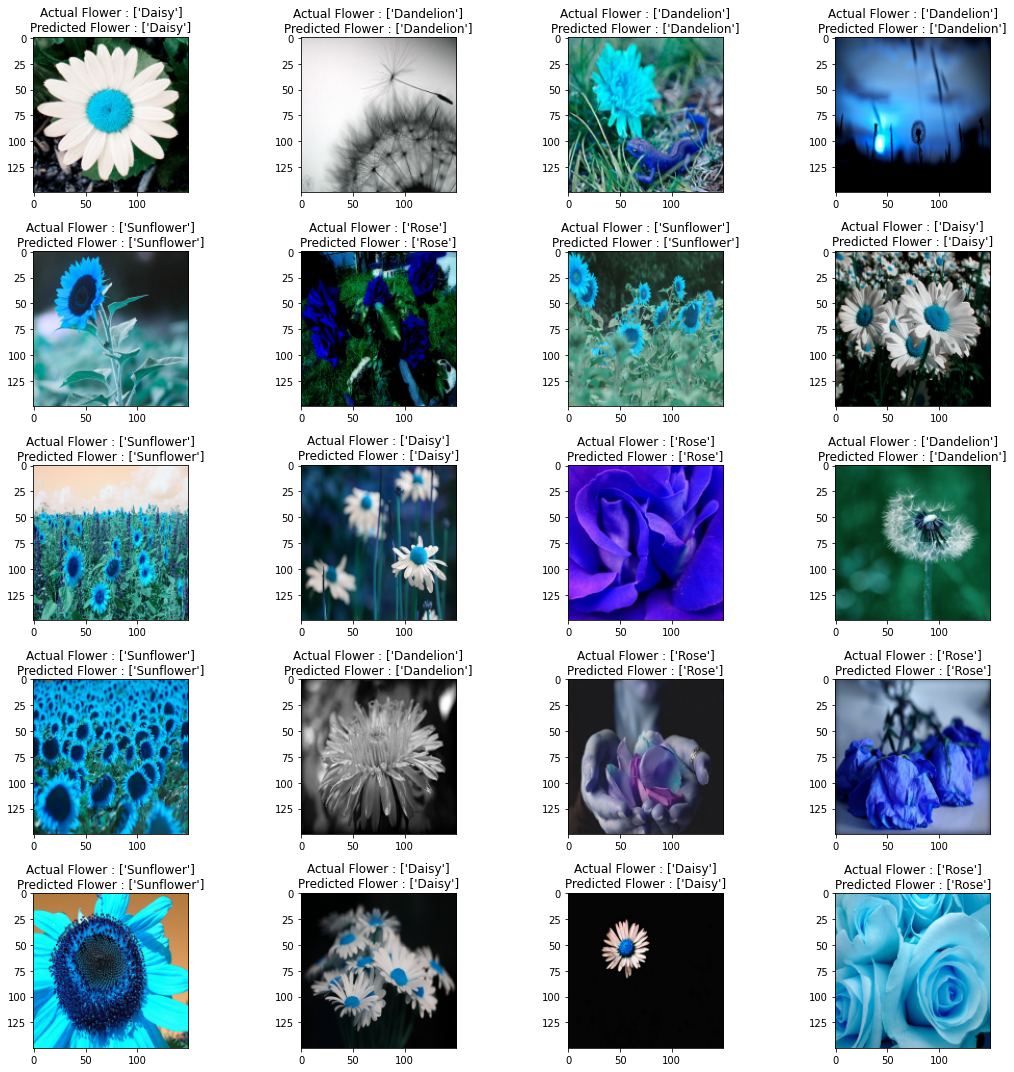

In [0]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
# printing some correctly found flowers
count = 0
for i in range (num_classes):
   for j in range (4):
        
        ax[i,j].imshow(X_test[corr[count]])
        #inverse_transform is done because we use encoder to change String to int
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[corr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[corr[count]]])))
        
        count+=1
        
plt.tight_layout()

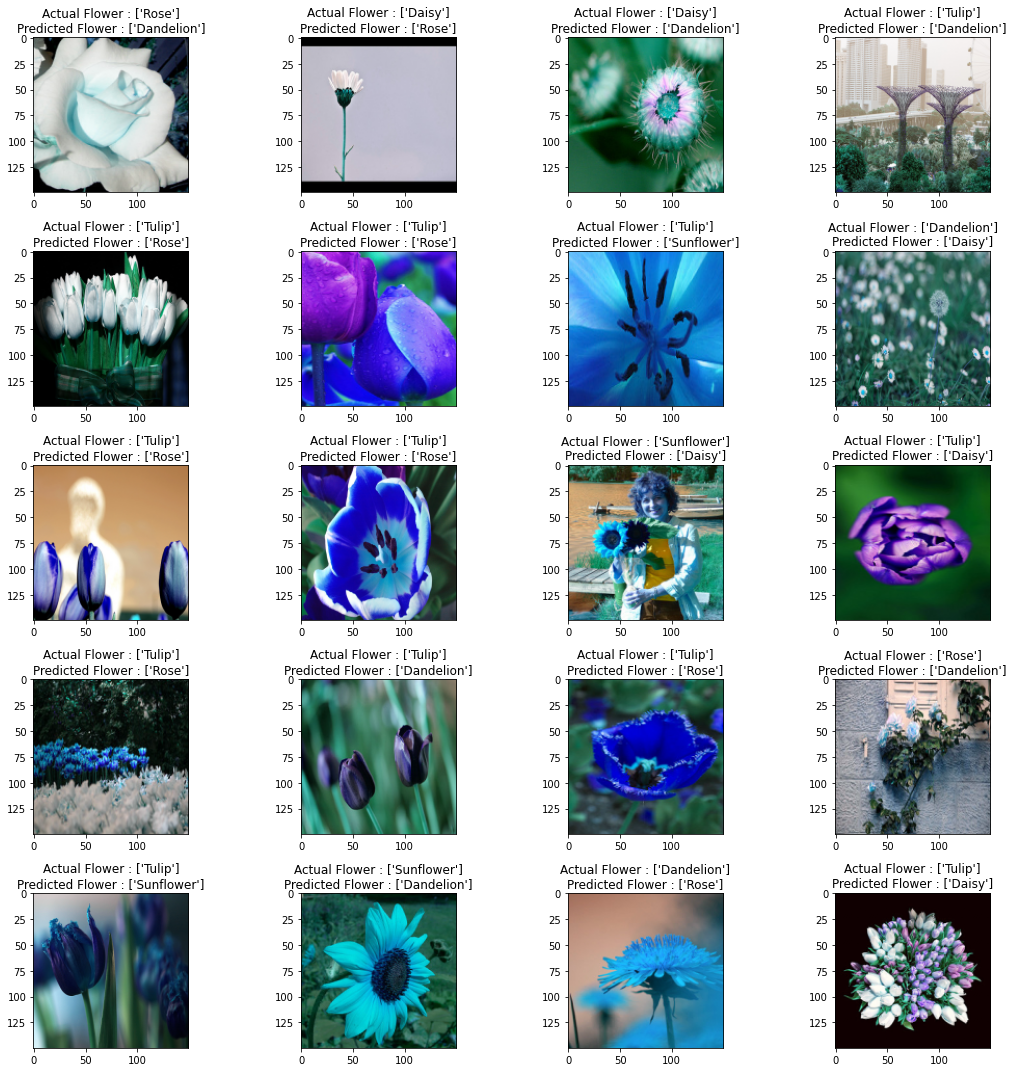

In [0]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
#printing some wrongly found flowers
count = 0
for i in range (num_classes):
    for j in range (4):
        ax[i,j].imshow(X_test[incorr[count]])        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[incorr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[incorr[count]]])))

        count+=1
        
plt.tight_layout()